In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import time
import requests

In [2]:
file = pd.read_csv("survey.csv")
file.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
large_co = file[file["no_employees"]=="More than 1000"]
medium_co = file[file["no_employees"]=="100-500"]
small_co = file[file["no_employees"]=="26-100"]
tiny_co = file[file["no_employees"]=="6-25"]

In [5]:
tiny_co.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
10,2014-08-27 11:32:44,31,Male,United States,OH,NaN,No,Yes,Sometimes,6-25,...,Don't know,No,No,Some of them,Yes,No,No,Don't know,No,NaN
14,2014-08-27 11:33:57,27,Male,Canada,NaN,NaN,No,No,Never,6-25,...,Somewhat easy,No,No,Some of them,Some of them,Maybe,Yes,Yes,No,NaN


In [6]:
small_co.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
9,2014-08-27 11:32:43,23,Male,Canada,NaN,NaN,No,No,Never,26-100,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN
12,2014-08-27 11:33:23,42,female,United States,CA,NaN,Yes,Yes,Sometimes,26-100,...,Somewhat difficult,Yes,Yes,Yes,Yes,Maybe,Maybe,No,Yes,NaN
15,2014-08-27 11:34:00,29,female,United States,IL,NaN,Yes,Yes,Rarely,26-100,...,Somewhat easy,No,No,Yes,Some of them,Maybe,Maybe,Don't know,No,I have chronic low-level neurological issues t...
16,2014-08-27 11:34:20,23,Male,United Kingdom,NaN,NaN,No,Yes,Sometimes,26-100,...,Very easy,Maybe,No,Some of them,No,Maybe,Maybe,No,No,My company does provide healthcare but not to ...


In [7]:
medium_co.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
11,2014-08-27 11:32:49,29,male,Bulgaria,NaN,NaN,No,No,Never,100-500,...,Don't know,No,No,Yes,Yes,Yes,Yes,Don't know,No,NaN
20,2014-08-27 11:35:12,29,Male,United States,NY,No,Yes,Yes,Sometimes,100-500,...,Somewhat difficult,Maybe,No,Some of them,Some of them,No,No,No,No,NaN
37,2014-08-27 11:41:50,38,Male,Portugal,NaN,No,No,No,NaN,100-500,...,Somewhat easy,Maybe,No,Some of them,Some of them,No,Maybe,No,No,NaN


In [8]:
large_co.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
23,2014-08-27 11:36:24,41,Male,United States,IA,No,No,Yes,Never,More than 1000,...,Don't know,Maybe,No,No,No,No,Yes,Don't know,No,NaN
25,2014-08-27 11:37:08,35,male,United States,TN,No,Yes,Yes,Sometimes,More than 1000,...,Very easy,Yes,No,Some of them,Yes,No,Yes,No,No,Sometimes I think about using drugs for my me...
39,2014-08-27 11:42:15,35,M,United States,TX,No,No,Yes,Rarely,More than 1000,...,Very easy,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN
41,2014-08-27 11:42:31,35,Male,United States,MI,No,No,No,NaN,More than 1000,...,Somewhat difficult,Yes,Yes,Some of them,No,No,Maybe,Don't know,No,NaN


In [9]:
tiny_co_big_concern = tiny_co[tiny_co["mental_health_consequence"]=="Yes"]
tiny_co_maybe_concern = tiny_co[tiny_co["mental_health_consequence"]=="Maybe"]
tiny_co_no_concern = tiny_co[tiny_co["mental_health_consequence"]=="No"]
tn = tiny_co_no_concern['mental_health_consequence'].count()
tm = tiny_co_maybe_concern['mental_health_consequence'].count()
tb = tiny_co_big_concern['mental_health_consequence'].count()
print(tn, tm, tb)

127 108 55


In [10]:
small_co_big_concern = small_co[small_co["mental_health_consequence"]=="Yes"]
small_co_maybe_concern = small_co[small_co["mental_health_consequence"]=="Maybe"]
small_co_no_concern = small_co[small_co["mental_health_consequence"]=="No"]
sn = small_co_no_concern['mental_health_consequence'].count()
sm = small_co_maybe_concern['mental_health_consequence'].count()
sb = small_co_big_concern['mental_health_consequence'].count()
print(sn,sm,sb)

117 106 66


In [11]:
medium_co_big_concern = medium_co[medium_co["mental_health_consequence"]=="Yes"]
medium_co_maybe_concern = medium_co[medium_co["mental_health_consequence"]=="Maybe"]
medium_co_no_concern = medium_co[medium_co["mental_health_consequence"]=="No"]
mn = medium_co_no_concern['mental_health_consequence'].count()
mm = medium_co_maybe_concern['mental_health_consequence'].count()
mb = medium_co_big_concern['mental_health_consequence'].count()
print(mn,mm,mb)

67 70 39


In [12]:
large_co_big_concern = large_co[large_co["mental_health_consequence"]=="Yes"]
large_co_maybe_concern = large_co[large_co["mental_health_consequence"]=="Maybe"]
large_co_no_concern = large_co[large_co["mental_health_consequence"]=="No"]
ln = large_co_no_concern['mental_health_consequence'].count()
lm = large_co_maybe_concern['mental_health_consequence'].count()
lb = large_co_big_concern['mental_health_consequence'].count()
print(ln,lm,lb)

88 113 81


Text(0.5, 1.0, 'Tiny Company Size vs. Mental Health Concern')

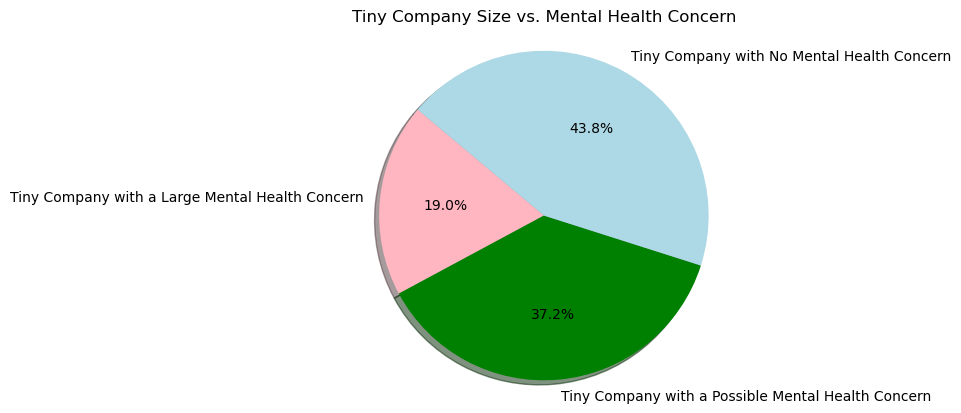

In [13]:
tiny_x_values = ["Tiny Company with a Large Mental Health Concern", 
                 "Tiny Company with a Possible Mental Health Concern", 
                 "Tiny Company with No Mental Health Concern"]
tiny_y_values = [tb, tm, tn]
colors = ["lightpink", "green", "lightblue"]
explode = (0, 0, 0)
plt.pie(tiny_y_values, explode = explode, labels = tiny_x_values, colors = colors, 
       autopct = "%1.1f%%", shadow = True, startangle = 140)
plt.axis("equal")
plt.title("Tiny Company Size vs. Mental Health Concern")

Text(0.5, 1.0, 'Small Company Size vs. Mental Health Concern')

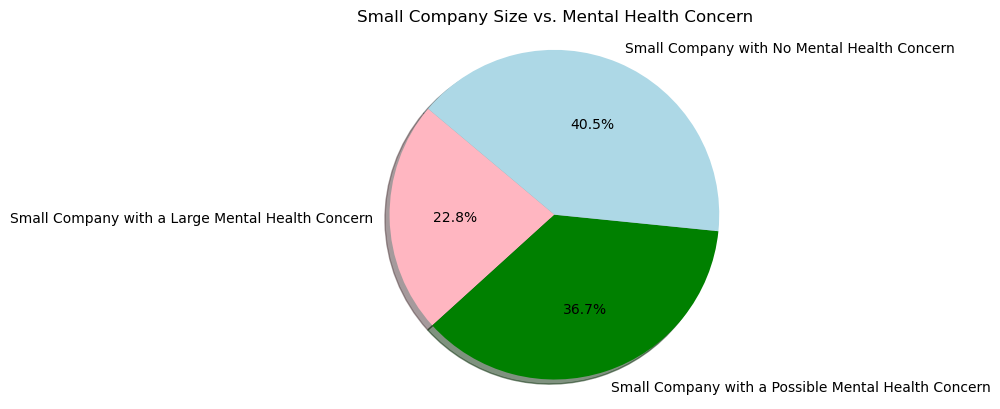

In [14]:
small_x_values = ["Small Company with a Large Mental Health Concern", 
                 "Small Company with a Possible Mental Health Concern", 
                 "Small Company with No Mental Health Concern"]
small_y_values = [sb, sm, sn]
colors = ["lightpink", "green", "lightblue"]
explode = (0, 0, 0)
plt.pie(small_y_values, explode = explode, labels = small_x_values, colors = colors, 
       autopct = "%1.1f%%", shadow = True, startangle = 140)
plt.axis("equal")
plt.title("Small Company Size vs. Mental Health Concern")

Text(0.5, 1.0, 'Medium Company Size vs. Mental Health Concern')

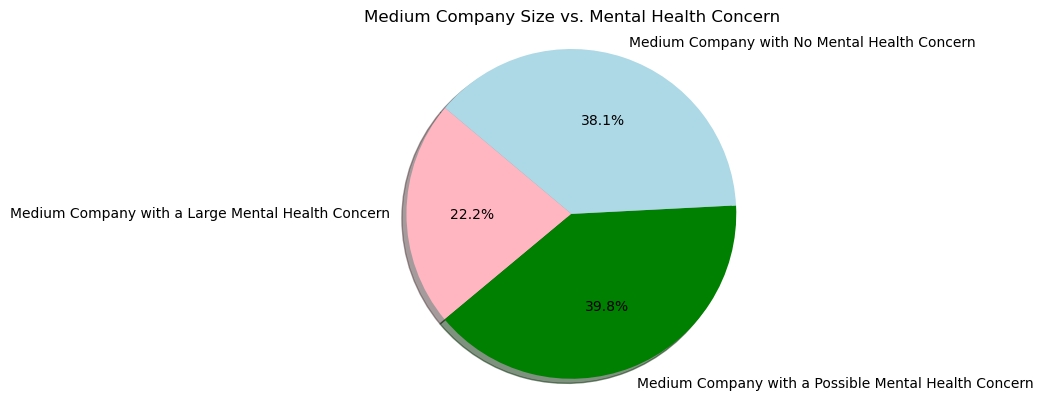

In [15]:
medium_x_values = ["Medium Company with a Large Mental Health Concern", 
                 "Medium Company with a Possible Mental Health Concern", 
                 "Medium Company with No Mental Health Concern"]
medium_y_values = [mb, mm, mn]
colors = ["lightpink", "green", "lightblue"]
explode = (0, 0, 0)
plt.pie(medium_y_values, explode = explode, labels = medium_x_values, colors = colors, 
       autopct = "%1.1f%%", shadow = True, startangle = 140)
plt.axis("equal")
plt.title("Medium Company Size vs. Mental Health Concern")

Text(0.5, 1.0, 'Large Company Size vs. Mental Health Concern')

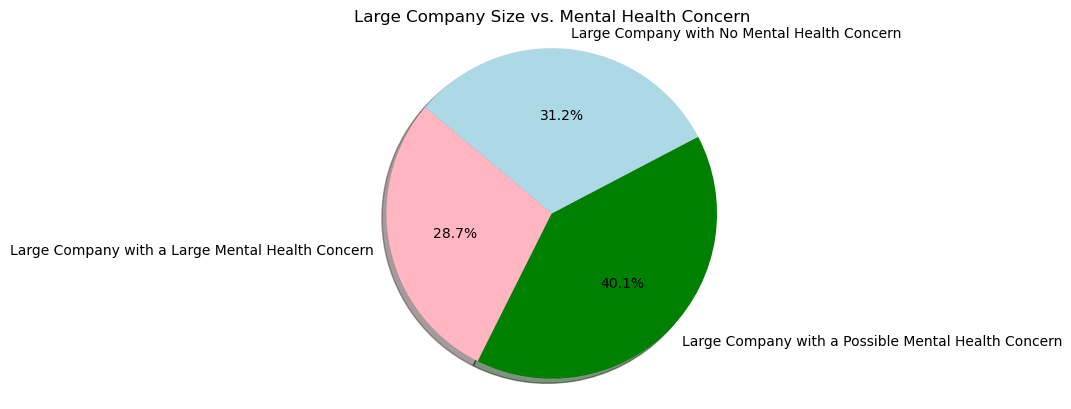

In [16]:
large_x_values = ["Large Company with a Large Mental Health Concern", 
                 "Large Company with a Possible Mental Health Concern", 
                 "Large Company with No Mental Health Concern"]
large_y_values = [lb, lm, ln]
colors = ["lightpink", "green", "lightblue"]
explode = (0, 0, 0)
plt.pie(large_y_values, explode = explode, labels = large_x_values, colors = colors, 
       autopct = "%1.1f%%", shadow = True, startangle = 140)
plt.axis("equal")
plt.title("Large Company Size vs. Mental Health Concern")

In [20]:
companysizes = [0,1,2,3]

In [21]:
nmhc = [43.8, 40.5, 38.1, 31.2]
mmhc = [37.2, 36.7, 39.8, 40.1]
lmhc = [19, 22.8, 22.2, 28.7]

([<matplotlib.axis.XTick at 0x7f90414f7a00>,
 [Text(0, 0, 'Tiny Company'),
  Text(1, 0, 'Small Company'),
  Text(2, 0, 'Medium Company'),
  Text(3, 0, 'Large Company')])

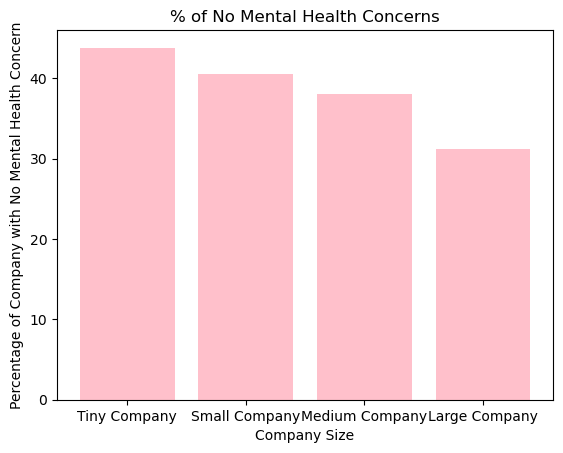

In [27]:
nmhcbar = plt.bar(companysizes, nmhc, color = "pink")
plt.title("% of No Mental Health Concerns")
plt.xlabel("Company Size")
plt.ylabel("Percentage of Company with No Mental Health Concern")
tick_locations = [value for value in companysizes]
plt.xticks(tick_locations,["Tiny Company", "Small Company", "Medium Company", "Large Company"])

([<matplotlib.axis.XTick at 0x7f90207226d0>,
 [Text(0, 0, 'Tiny Company'),
  Text(1, 0, 'Small Company'),
  Text(2, 0, 'Medium Company'),
  Text(3, 0, 'Large Company')])

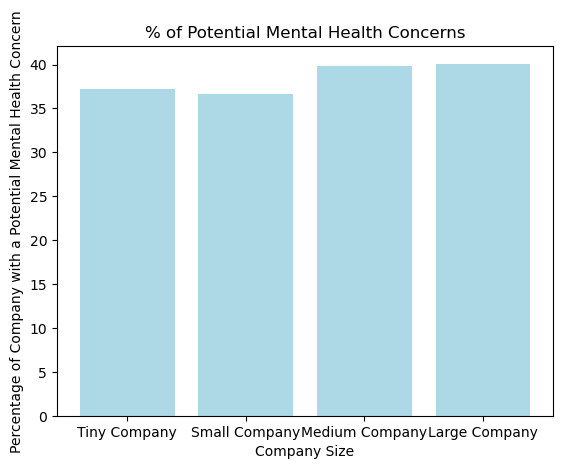

In [30]:
mmhcbar = plt.bar(companysizes, mmhc, color = "lightblue")
plt.title("% of Potential Mental Health Concerns")
plt.xlabel("Company Size")
plt.ylabel("Percentage of Company with a Potential Mental Health Concern")
tick_locations = [value for value in companysizes]
plt.xticks(tick_locations,["Tiny Company", "Small Company", "Medium Company", "Large Company"])

([<matplotlib.axis.XTick at 0x7f90205f24c0>,
 [Text(0, 0, 'Tiny Company'),
  Text(1, 0, 'Small Company'),
  Text(2, 0, 'Medium Company'),
  Text(3, 0, 'Large Company')])

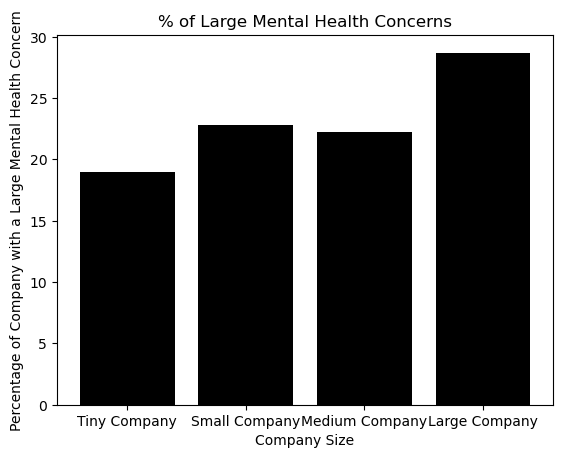

In [33]:
lmhcbar = plt.bar(companysizes, lmhc, color = "black")
plt.title("% of Large Mental Health Concerns")
plt.xlabel("Company Size")
plt.ylabel("Percentage of Company with a Large Mental Health Concern")
tick_locations = [value for value in companysizes]
plt.xticks(tick_locations,["Tiny Company", "Small Company", "Medium Company", "Large Company"])

In [34]:
file.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [35]:
close_r = file[file["coworkers"]=="Yes"]
some_r = file[file["coworkers"]=="Some of them"]
no_r = file[file["coworkers"]=="No"]

In [36]:
close_r.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
9,2014-08-27 11:32:43,23,Male,Canada,NaN,NaN,No,No,Never,26-100,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN
11,2014-08-27 11:32:49,29,male,Bulgaria,NaN,NaN,No,No,Never,100-500,...,Don't know,No,No,Yes,Yes,Yes,Yes,Don't know,No,NaN


In [37]:
some_r.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
10,2014-08-27 11:32:44,31,Male,United States,OH,NaN,No,Yes,Sometimes,6-25,...,Don't know,No,No,Some of them,Yes,No,No,Don't know,No,NaN


In [38]:
no_r.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
7,2014-08-27 11:32:05,39,M,Canada,NaN,NaN,No,No,Never,1-5,...,Don't know,No,No,No,No,No,No,No,No,NaN
23,2014-08-27 11:36:24,41,Male,United States,IA,No,No,Yes,Never,More than 1000,...,Don't know,Maybe,No,No,No,No,Yes,Don't know,No,NaN
31,2014-08-27 11:38:55,31,Male,United States,PA,Yes,Yes,No,Rarely,1-5,...,Somewhat difficult,Yes,No,No,No,No,No,No,Yes,NaN
43,2014-08-27 11:43:10,18,Male,Netherlands,NaN,No,No,No,Often,6-25,...,Somewhat difficult,Yes,Maybe,No,Some of them,No,No,No,No,NaN


In [39]:
close_r_big_concern = close_r[close_r["mental_health_consequence"]=="Yes"]
close_r_maybe_concern = close_r[close_r["mental_health_consequence"]=="Maybe"]
close_r_no_concern = close_r[close_r["mental_health_consequence"]=="No"]
cn = close_r_no_concern['mental_health_consequence'].count()
cm = close_r_maybe_concern['mental_health_consequence'].count()
cb = close_r_big_concern['mental_health_consequence'].count()
print(cn, cm, cb)

166 48 11


In [40]:
some_r_big_concern = some_r[some_r["mental_health_consequence"]=="Yes"]
some_r_maybe_concern = some_r[some_r["mental_health_consequence"]=="Maybe"]
some_r_no_concern = some_r[some_r["mental_health_consequence"]=="No"]
sn = some_r_no_concern['mental_health_consequence'].count()
sm = some_r_maybe_concern['mental_health_consequence'].count()
sb = some_r_big_concern['mental_health_consequence'].count()
print(sn, sm, sb)

292 340 142


In [41]:
no_r_big_concern = no_r[no_r["mental_health_consequence"]=="Yes"]
no_r_maybe_concern = no_r[no_r["mental_health_consequence"]=="Maybe"]
no_r_no_concern = no_r[no_r["mental_health_consequence"]=="No"]
non = no_r_no_concern['mental_health_consequence'].count()
nom = no_r_maybe_concern['mental_health_consequence'].count()
nob = no_r_big_concern['mental_health_consequence'].count()
print(non, nom, nob)

32 89 139


Text(0.5, 1.0, 'Close Coworker Relationships vs. Mental Health Concern')

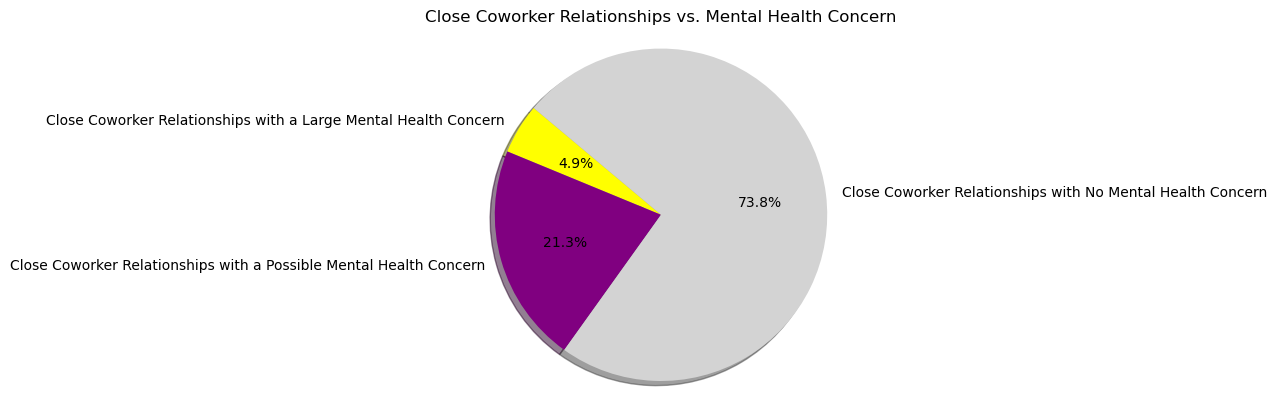

In [50]:
close_r_x_values = ["Close Coworker Relationships with a Large Mental Health Concern", 
                 "Close Coworker Relationships with a Possible Mental Health Concern", 
                 "Close Coworker Relationships with No Mental Health Concern"]
close_r_y_values = [cb, cm, cn]
colors = ["yellow", "purple", "lightgrey"]
explode = (0, 0, 0)
plt.pie(close_r_y_values, explode = explode, labels = close_r_x_values, colors = colors, 
       autopct = "%1.1f%%", shadow = True, startangle = 140)
plt.axis("equal")
plt.title("Close Coworker Relationships vs. Mental Health Concern")

Text(0.5, 1.0, 'Some Coworker Relationships vs. Mental Health Concern')

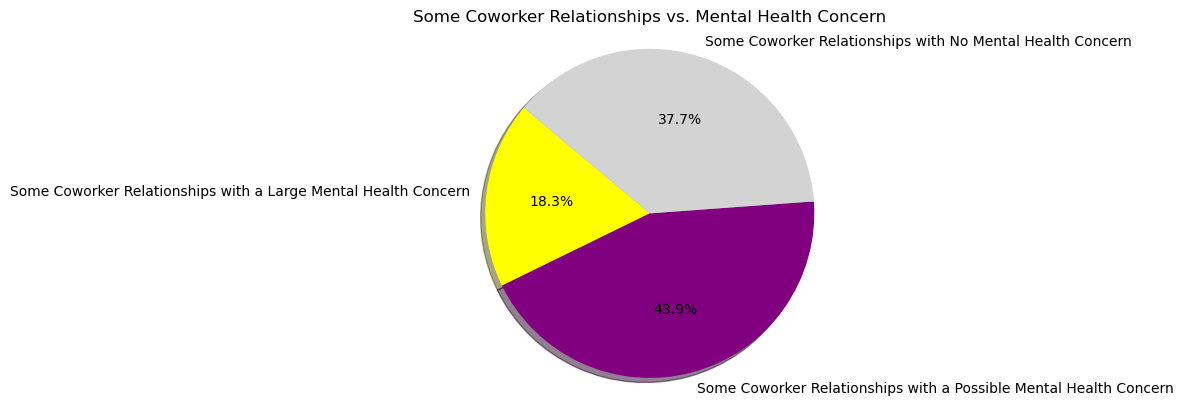

In [49]:
some_r_x_values = ["Some Coworker Relationships with a Large Mental Health Concern", 
                 "Some Coworker Relationships with a Possible Mental Health Concern", 
                 "Some Coworker Relationships with No Mental Health Concern"]
some_r_y_values = [sb, sm, sn]
colors = ["yellow", "purple", "lightgrey"]
explode = (0, 0, 0)
plt.pie(some_r_y_values, explode = explode, labels = some_r_x_values, colors = colors, 
       autopct = "%1.1f%%", shadow = True, startangle = 140)
plt.axis("equal")
plt.title("Some Coworker Relationships vs. Mental Health Concern")

Text(0.5, 1.0, 'No Coworker Relationships vs. Mental Health Concern')

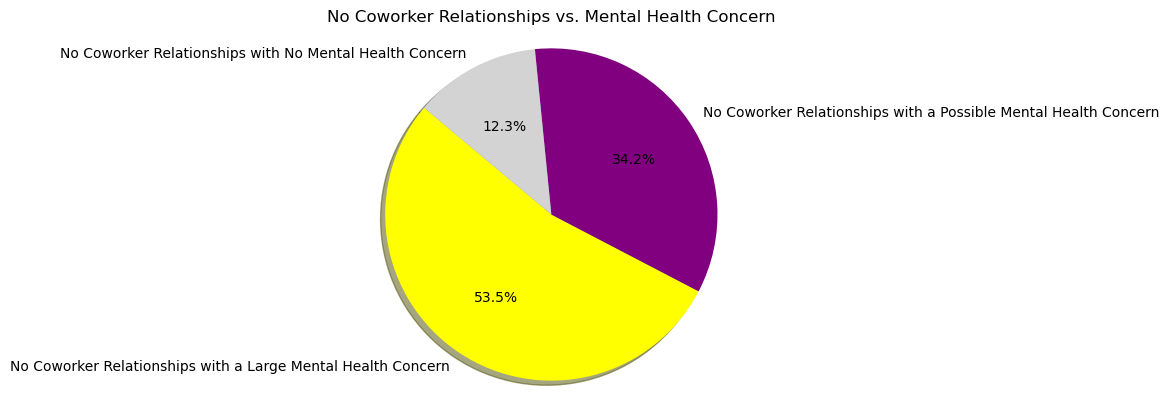

In [48]:
no_r_x_values = ["No Coworker Relationships with a Large Mental Health Concern", 
                 "No Coworker Relationships with a Possible Mental Health Concern", 
                 "No Coworker Relationships with No Mental Health Concern"]
no_r_y_values = [nob, nom, non]
colors = ["yellow", "purple", "lightgrey"]
explode = (0, 0, 0)
plt.pie(no_r_y_values, explode = explode, labels = no_r_x_values, colors = colors, 
       autopct = "%1.1f%%", shadow = True, startangle = 140)
plt.axis("equal")
plt.title("No Coworker Relationships vs. Mental Health Concern")

In [54]:
relationships = [0,1,2]
rnmhc = [73.8, 37.7, 12.3]
rsmhc = [21.3, 43.9, 34.2]
rlmhc = [4.9, 18.3, 53.5]

([<matplotlib.axis.XTick at 0x7f9030ae25b0>,
 [Text(0, 0, 'Close Relationship'),
  Text(1, 0, 'Some Relationship'),
  Text(2, 0, 'No Relationship')])

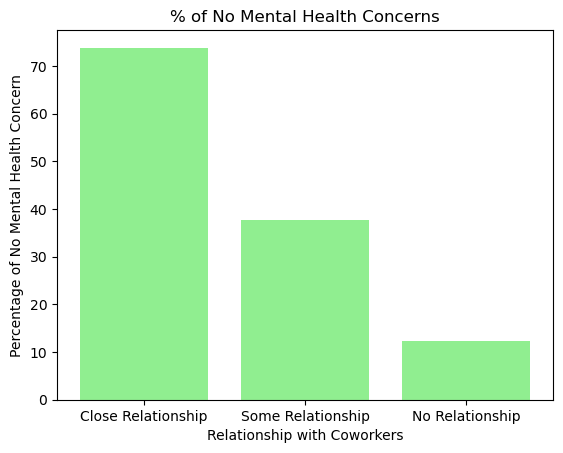

In [57]:
rnmhcbar = plt.bar(relationships, rnmhc, color = "lightgreen")
plt.title("% of No Mental Health Concerns")
plt.xlabel("Relationship with Coworkers")
plt.ylabel("Percentage of No Mental Health Concern")
tick_locations = [value for value in relationships]
plt.xticks(tick_locations,["Close Relationship", "Some Relationship", "No Relationship"])

([<matplotlib.axis.XTick at 0x7f9053759eb0>,
 [Text(0, 0, 'Close Relationship'),
  Text(1, 0, 'Some Relationship'),
  Text(2, 0, 'No Relationship')])

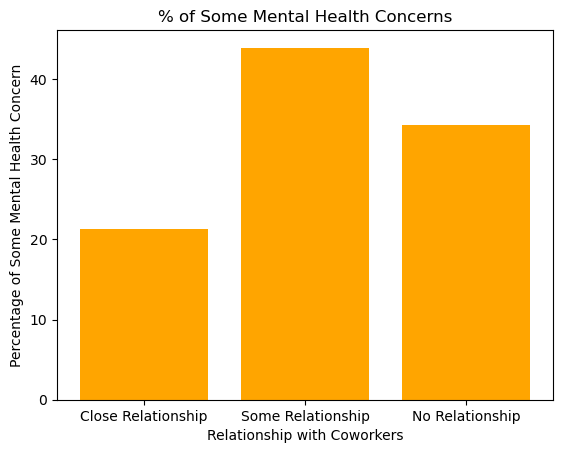

In [68]:
rsmhcbar = plt.bar(relationships, rsmhc, color = "orange")
plt.title("% of Some Mental Health Concerns")
plt.xlabel("Relationship with Coworkers")
plt.ylabel("Percentage of Some Mental Health Concern")
tick_locations = [value for value in relationships]
plt.xticks(tick_locations,["Close Relationship", "Some Relationship", "No Relationship"])

([<matplotlib.axis.XTick at 0x7f9020864c70>,
 [Text(0, 0, 'Close Relationship'),
  Text(1, 0, 'Some Relationship'),
  Text(2, 0, 'No Relationship')])

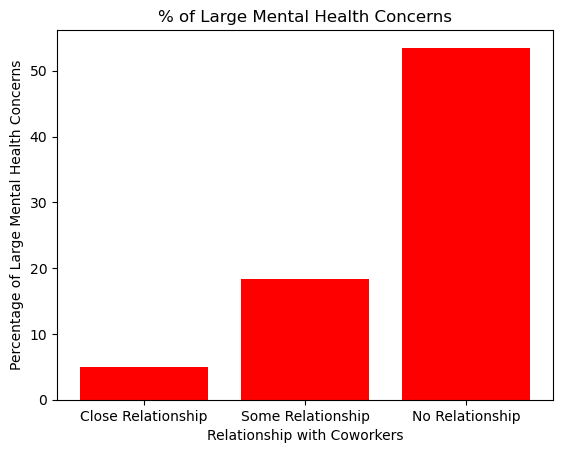

In [67]:
rlmhcbar = plt.bar(relationships, rlmhc, color = "red")
plt.title("% of Large Mental Health Concerns")
plt.xlabel("Relationship with Coworkers")
plt.ylabel("Percentage of Large Mental Health Concerns")
tick_locations = [value for value in relationships]
plt.xticks(tick_locations,["Close Relationship", "Some Relationship", "No Relationship"])